In [29]:
import numpy as np
import math 
import random
import matplotlib.pyplot as plt

In [30]:
def G(theta):
  accl = -10*((math.sin(math.radians(theta)))**2 + 0.6*(math.sin((math.radians(theta))**2)) + 0.5*math.sin(math.radians(theta))) - 0.12
  #accl = -3*math.sin(theta)
  return accl

In [31]:
G(0)

-0.12

In [32]:
G(30)

-6.744405459860116

In [33]:
def G1(theta):
  accl = -10*((math.sin(math.radians(theta)))**2 + (0.6+random.randrange(0,10,1)/100)*(math.sin((math.radians(theta))**2)) + 0.5*math.sin(math.radians(theta)) - math.sin(((math.radians(theta))**3)/100)) - (random.randrange(0,20,1))/100
  #accl = -3*math.sin(theta) + random.randrange(0,20)/100
  return accl

In [34]:
G1(30)

-6.94663810171565

In [35]:
def dG(theta):
  daccl = -10*(2*math.sin(math.radians(theta))*math.cos(math.radians(theta)) + 0.6*math.sin((math.radians(theta))**2)*math.cos((math.radians(theta))**2)*2*(math.radians(theta)) + 0.5*math.cos(math.radians(theta)))
  return daccl

In [36]:
dG(5)

-6.725429824198796

In [37]:
def Newton(theta,error,accelaration):
  if abs(G(theta)-accelaration) <= error:
    return theta
  else:
    while True:
      theta_new = theta - ((G(theta)-accelaration)/(dG(theta)-accelaration))
      theta = theta_new
      if abs(G(theta_new)-accelaration) <= error:
        break
    return(abs(theta_new))

In [38]:
def real_vel(accl,s,v1):
  v_square = (v1**2 + 2*accl*s)
  if v_square >= 0:
    v_root = v_square**0.5
  else:
    v_root = 0
  return v_root 

In [39]:
real_vel(G1(Newton(1,0.0001,-0.45)),0.2,30)

29.997734020052246

In [40]:
def lagrangian(x,n,list_x,list_y):
  f = 0
  for i in range(n+1):
    f_ = list_y[i]
    for j in range(n+1):
      if j != i:
        f_ = f_*((x-list_x[j])/(list_x[i]-list_x[j]))
    f += f_
  return f

In [41]:
def dvel(vel_list,interval):
  return (vel_list[len(vel_list)-1] - vel_list[len(vel_list)-2])/interval

In [42]:
# Function to find the product term
def proterm(i, value, x):
	pro = 1;
	for j in range(i):
		pro = pro * (value - x[j]);
	return pro;

# Function for calculating
# divided difference table
def dividedDiffTable(x, y, n):

	for i in range(1, n):
		for j in range(n - i):
			y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
									(x[j] - x[i + j]));
	return y;

# Function for applying Newton's
# divided difference formula
def applyFormula(value, x, y, n):

	sum = y[0][0];

	for i in range(1, n):
		sum = sum + (proterm(i, value, x) * y[0][i]);
	
	return sum;

# Function for displaying divided
# difference table
def printDiffTable(y, n):

	for i in range(n):
		for j in range(n - i):
			print(round(y[i][j], 4), "\t",
							end = " ");

		print("");

# calculating divided difference table
# y=dividedDiffTable(x, y, n)



# Driver Code

# # number of inputs given
# n = len(dist_list)
# # Newton divided difference formula
# x=dist_list[(len(dist_list)-2):]
# y=[len(dist_list)][len(dist_list)]
# y_in=[]
# for i in range((len(dist_list)-2)):
#   y[i][0]=real_vel_list[i]
#   y_in.append(real_vel_list[i])



In [45]:
initial_vel = 10
initial_dist = 1000
dist_int = 1
final_vel = 0
final_dist = 0
n=3
dist = initial_dist
vel = initial_vel
pred_vel_list = [initial_vel]
real_vel_list = [initial_vel,final_vel]
dist_list = [initial_dist,final_dist]
error = 0
thetas = []
y = [[0 for i in range(110)] 
        for j in range(110)]; 


while True:
  dist -= dist_int
  if dist <= final_dist:
    print('velocity error = ' + str(error))
    print('absolute velocity error = ' + str(real_v-final_vel))
    break
  #pred_vel = lagrangian(dist,1,dist_list[(len(dist_list)-2):],real_vel_list[(len(real_vel_list)-2):])
  #pred_vel = lagrangian(dist,(len(real_vel_list)-1),dist_list,real_vel_list)
  for i in range((len(dist_list))):
    y[i][0]=real_vel_list[i]
  pred_vel=applyFormula(dist, dist_list, y, n) 
  y=dividedDiffTable(dist_list, y, len(dist_list))
  #print(pred_vel)
  pred_vel_list.append(pred_vel)

  accl = abs(pred_vel)*(dvel(pred_vel_list,dist_int))
  #print(accl)
  if accl >= G(0):
    accl = G(0)
    #theta = 0
  if accl <= G(30):
    accl = G(30)
    #theta = 30
  theta = Newton(0.1,0.001,accl)
  if theta <= 0: 
    theta = 0
  if theta >= 30:
    theta = 30
  thetas.append(theta)
  #print(theta)
  real_accl = G1(theta)
  real_vel_list.remove(final_vel)
  real_v = real_vel(real_accl,dist_int,real_vel_list[len(real_vel_list)-2])
  if real_v <= final_vel:
    real_vel_list.append(real_v)
    print('dist_error = ' + str(dist_list[len(dist_list)-2]))
    break
  real_vel_list.append(real_v)
  real_vel_list.append(final_vel)
  dist_list.remove(final_dist)
  dist_list.append(dist)
  dist_list.append(final_dist)
  error = real_v - pred_vel
print('thetas:')
print(thetas)

dist_error = 941
thetas:
[0.011282150202157908, 0.8596014458969923, 0.011282150202157908, 5.201475994819714, 3.5478258074611055, 4.358426304148917, 5.108198169379961, 5.803925717559352, 6.450570828902018, 7.051965986661876, 7.610846388855265, 8.129247489210567, 8.608516759886884, 9.050020493307382, 9.454325835306499, 9.82185902415055, 10.152651698450788, 10.44694414898467, 10.70434165109699, 10.924546439046976, 11.106651045250851, 11.250131155071642, 11.353712808875477, 11.416484115208275, 11.436899674790991, 11.41331768802409, 11.34382794957128, 11.226351041333581, 11.058021583473613, 10.836097005466419, 10.556876079506102, 10.216127946387662, 9.808912483944786, 9.328745344840465, 8.76823347459286, 8.11750388823358, 7.363759328651764, 6.490324976635899, 5.473102092623868, 4.276664185496028, 2.8438426445973475, 1.0702746430011352, 0.011282150202157908, 0.8700044179927818, 3.058801828224411, 5.023177652732435, 6.851350649475576, 8.589418731167246, 10.265707124143004, 11.898340639718562,

In [46]:
len(thetas)

60

Text(0, 0.5, 'Theta')

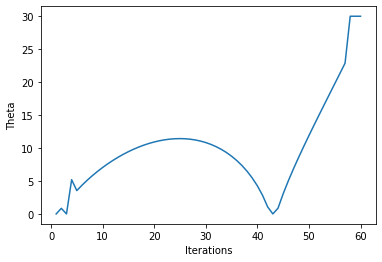

In [47]:
x=list(range(1, len(thetas)+1))
plt.plot(x, thetas)
plt.xlabel('Iterations')
plt.ylabel('Theta')